Anastasiia Leskiv

# Business Understanding

COVID-19 also known as SARS-CoV-2, caused by a newly identified coronavirus, typically results in mild to moderate respiratory illness for most infected individuals, often resolving without specific medical intervention. However, older individuals and those with pre-existing health issues such as cardiovascular disease, diabetes, chronic respiratory conditions, or cancer, are at a higher risk of developing severe illness.

Throughout the pandemic, healthcare providers have grappled with a critical challenge: a scarcity of medical resources and an effective distribution strategy. Anticipating the specific medical needs of individuals upon testing positive or even beforehand is paramount. This predictive ability could significantly assist authorities in proactively sourcing and organizing the requisite resources, potentially saving lives in critical situations during these challenging times.

The goal of this project is to build a machine learning model that, shows patient's current symptom, status, and medical history, predict patients who are at high risk of death from covid.

# Data Understanding

This data set contains 21 unique features and 1,048,576 unique patients
sex: 1 for female and 2 for male.In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: 1 for female and 2 for male.

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Explaratory Data Analysis

In [1]:
# import all necessary libraries
import numpy as np # for data matipulation
import pandas as pd # for data matipulation
import matplotlib.pyplot as plt #for plotting
%matplotlib inline 
import numpy as np #for data matipulation
import matplotlib.pyplot as plt#for plotting
import seaborn as sns #for plotting
%matplotlib inline
from sklearn.model_selection import train_test_split # for modeling 
from sklearn.linear_model import LogisticRegression# for modeling 
from sklearn.metrics import confusion_matrix# for modeling 
from sklearn.metrics import classification_report# for modeling 
import warnings
warnings.filterwarnings('ignore') # for warning ignoring
import sklearn.metrics as metrics# for modeling 
from sklearn.metrics import accuracy_score# for modeling 
from six import StringIO #used as input or output to the most function that would expect a standard file object
from IPython.display import Image 
from sklearn.tree import export_graphviz# for modeling 
from sklearn.model_selection import cross_val_score# for modeling 
import seaborn as sns #for plotting
from sklearn.tree import DecisionTreeClassifier# for modeling  
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier# for modeling 

In [2]:
# read CSV file and print 5 raws
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.shape

(1048575, 21)

In [4]:
#print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
#Checking null values
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

A good day is when there is no "NaN"in the data :D Let's look at our data to understand something about it.

In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
#checkind Unique Values
for col in df.columns : 
    print('{:<20} => {:>10}'.format(col, len(df[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


I can see that some of the columns have more then 2 unique values. I will take third out and leave just 2 just like I was expecting it to be.values as 97 and 99 are missing data.

 

In [8]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

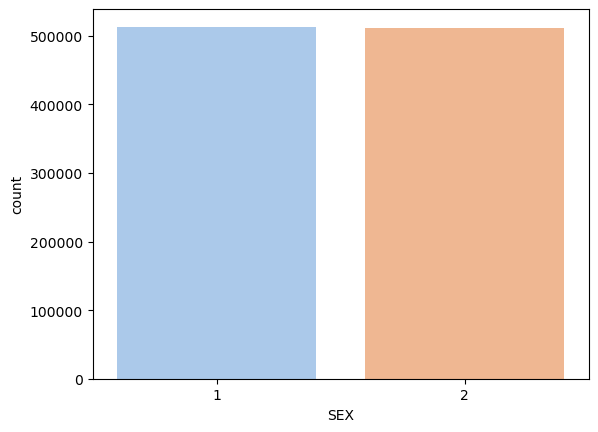

In [9]:
# Ploting countplot to compare whether gender affects the number 
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="SEX", data=df, palette="pastel")
plt.show()

In [10]:
df['SEX'].value_counts()

1    513216
2    511936
Name: SEX, dtype: int64

Okay, so gender does not affect the number 

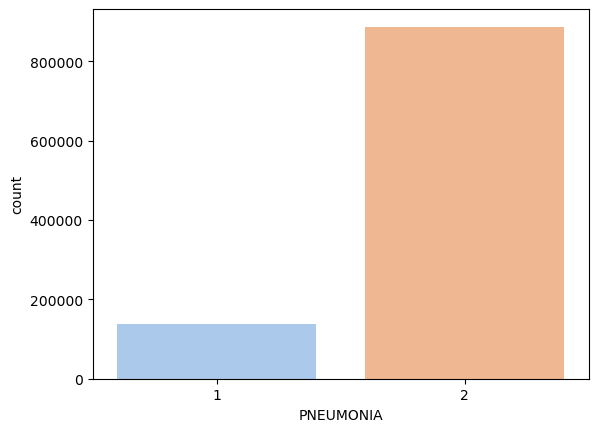

In [11]:
# Ploting countplot to compare people who have pneumonia or not
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="PNEUMONIA", data=df, palette="pastel")
plt.show()

In [12]:
df['PNEUMONIA'].value_counts()

2    887553
1    137599
Name: PNEUMONIA, dtype: int64

1 means "yes" and 2 means "no".This plot shows us that a lot less patients in our data set have pneumonia

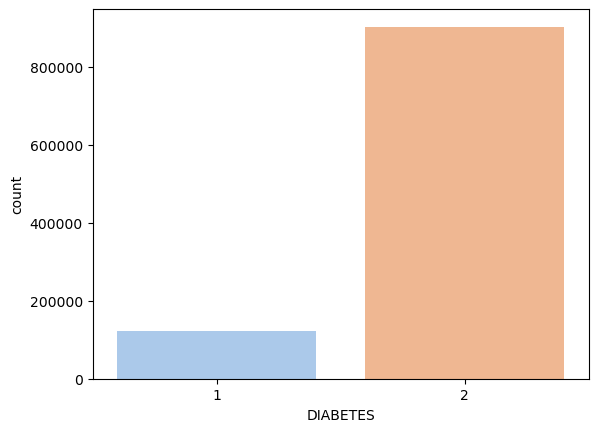

In [13]:
# Ploting countplot to compare people who have diabetes or not
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="DIABETES", data=df, palette="pastel")
plt.show()

In [14]:
df['DIABETES'].value_counts()

2    902737
1    122415
Name: DIABETES, dtype: int64

This plot shows us that a less more patients in our data set have

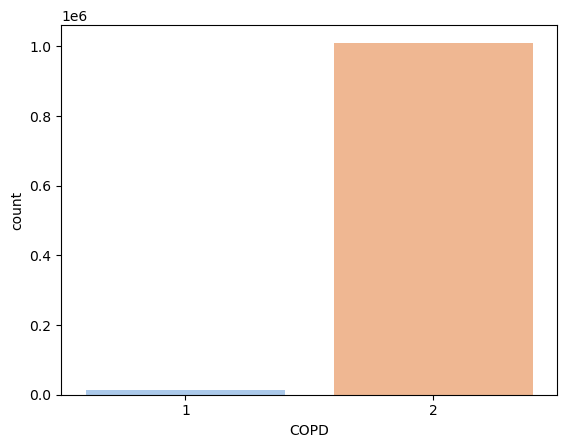

In [15]:
# Ploting countplot to see whether the patient has Chronic obstructive pulmonary disease or not
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="COPD", data=df, palette="pastel")
plt.show()

In [16]:
df['COPD'].value_counts()

2    1010776
1      14376
Name: COPD, dtype: int64

This plot shows us that a lot less patients in our data set have Chronic obstructive pulmonary disease

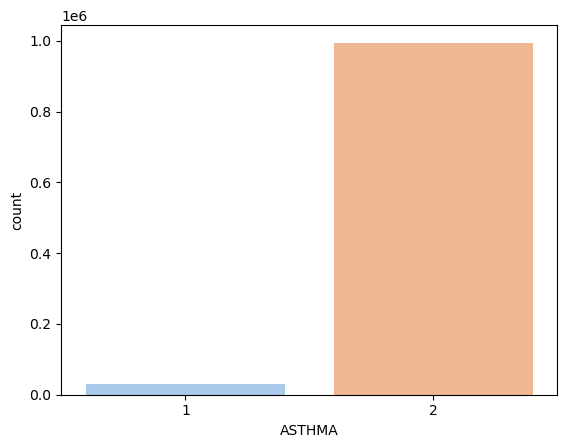

In [17]:
# Ploting countplot to see whether the patient has Asthma
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="ASTHMA", data=df, palette="pastel")
plt.show()

In [18]:
df['ASTHMA'].value_counts()

2    994655
1     30497
Name: ASTHMA, dtype: int64

This plot shows us that a lot less patients in our data set have Asthma

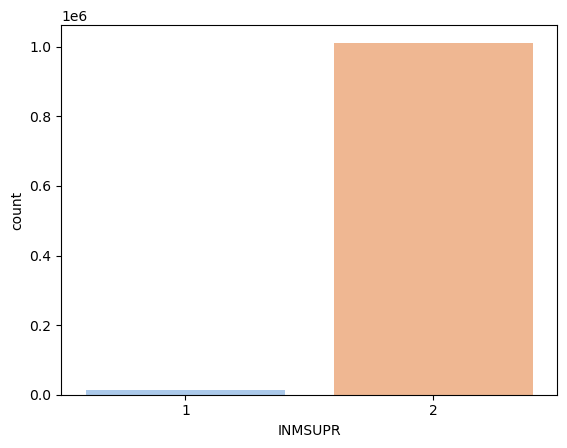

In [19]:
# Ploting countplot to see whether the patient is immunosuppressed or not
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="INMSUPR", data=df, palette="pastel")
plt.show()

In [20]:
df['INMSUPR'].value_counts()

2    1011564
1      13588
Name: INMSUPR, dtype: int64

This plot shows us that a lotless patients in our data set is immunosuppressed

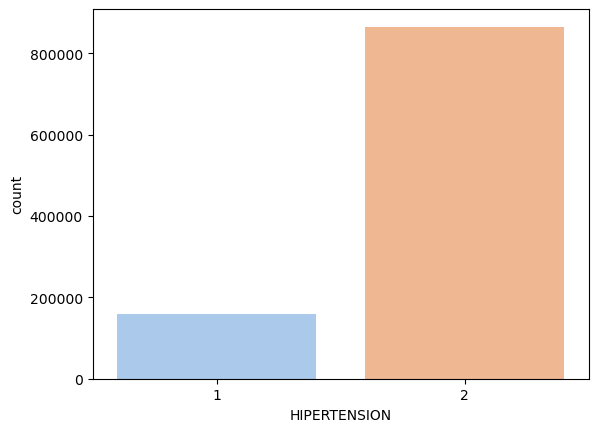

In [21]:
# Ploting countplot to see whether the patient has hypertension or not
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="HIPERTENSION", data=df, palette="pastel")
plt.show()

In [22]:
df['HIPERTENSION'].value_counts()

2    865575
1    159577
Name: HIPERTENSION, dtype: int64

This plot shows us that a lot less patients in our data set have hypertension

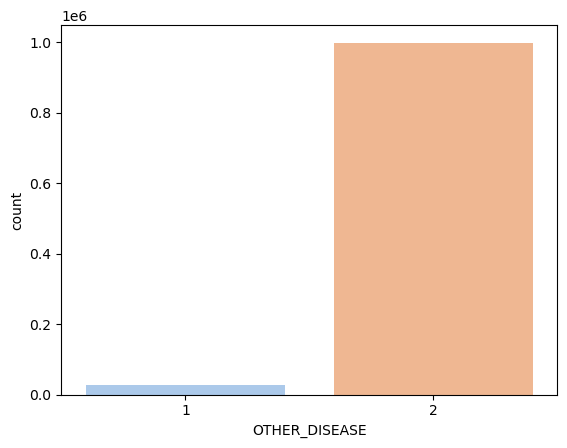

In [23]:
# Ploting countplot to see whether the patient has any other DISEASE
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="OTHER_DISEASE", data=df, palette="pastel")
plt.show()

In [24]:
df['OTHER_DISEASE'].value_counts()

2    998021
1     27131
Name: OTHER_DISEASE, dtype: int64

This plot shows us that a lot less patients in our data set also have some other diseases

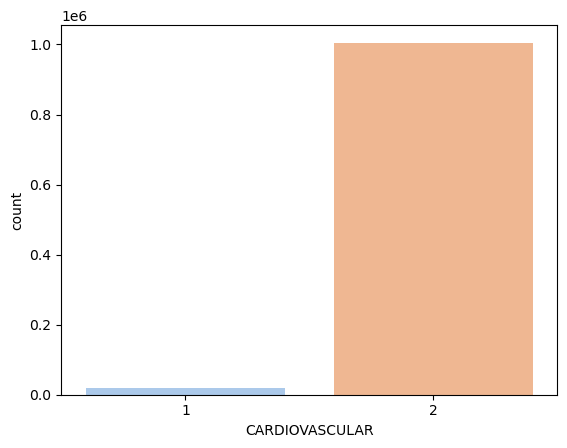

In [25]:
# Ploting countplot to see whether the patient has CARDIOVASCULAR disease
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="CARDIOVASCULAR", data=df, palette="pastel")
plt.show()

In [26]:
df['CARDIOVASCULAR'].value_counts()

2    1005026
1      20126
Name: CARDIOVASCULAR, dtype: int64

This plot shows us that a lot less patients in our data set also have CARDIOVASCULAR disease

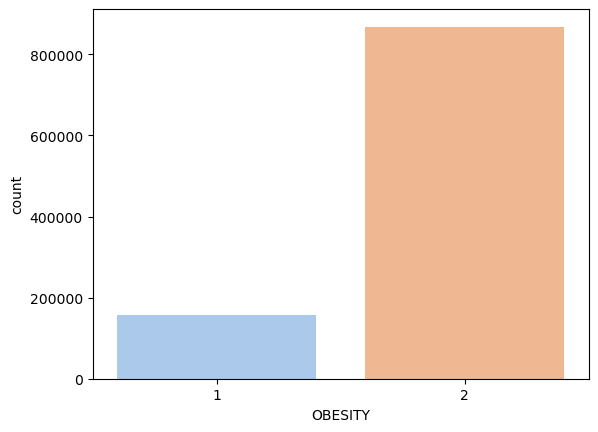

In [27]:
# Ploting countplot to see whether the patient has OBESITY
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="OBESITY", data=df, palette="pastel")
plt.show()

In [28]:
df['OBESITY'].value_counts()

2    868191
1    156961
Name: OBESITY, dtype: int64

This plot shows us that a lot less patients in our data set also have OBESITY

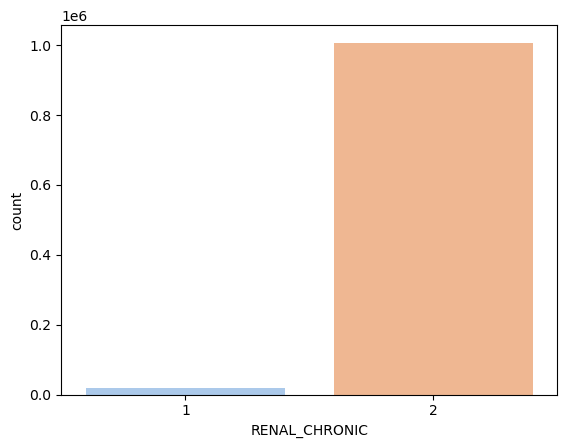

In [29]:
# Ploting countplot to see whether the patient has chronic renal disease or not.
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="RENAL_CHRONIC", data=df, palette="pastel")
plt.show()

In [30]:
df['RENAL_CHRONIC'].value_counts()

2    1006801
1      18351
Name: RENAL_CHRONIC, dtype: int64

This plot shows us that a lot less patients in our data set also have chronic renal disease

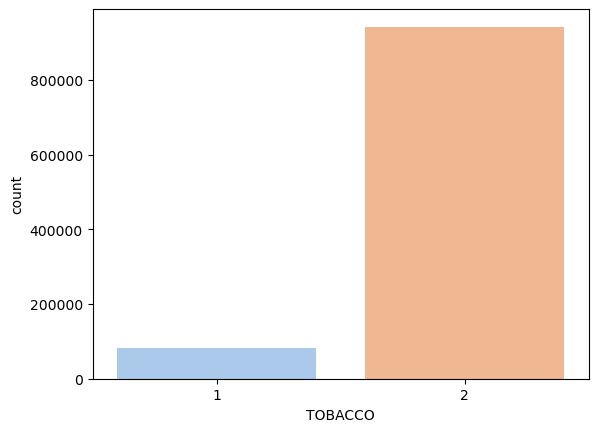

In [31]:
# Ploting countplot to compare people who use tabacco or not 
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="TOBACCO", data=df, palette="pastel")
plt.show()

In [32]:
df['TOBACCO'].value_counts()

2    942477
1     82675
Name: TOBACCO, dtype: int64

This plot shows us that a lot less patients in our data are smokers

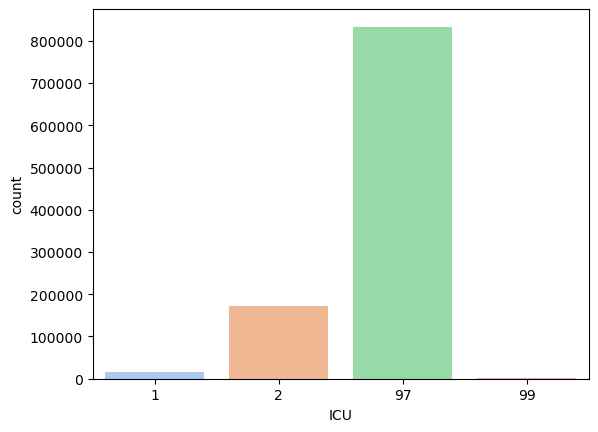

In [33]:
# Ploting countplot to see whether the patient had been admitted to an Intensive Care Unit
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="ICU", data=df, palette="pastel")
plt.show()

In [34]:
df['CARDIOVASCULAR'].value_counts()

2    1005026
1      20126
Name: CARDIOVASCULAR, dtype: int64

Okay, here we have a lot of missing value so I will drop thi scolumn

In [35]:
df.drop(columns=["ICU"], inplace=True)

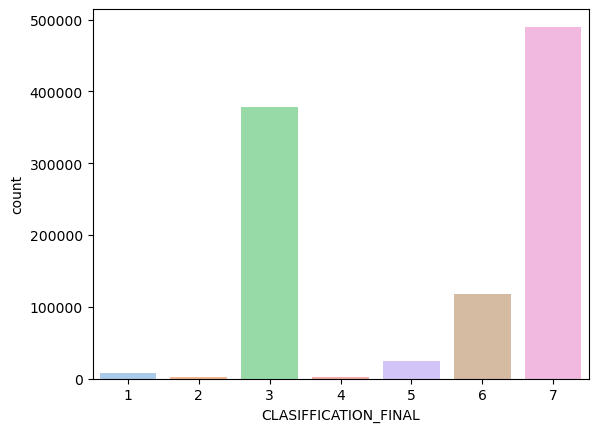

In [36]:
#covid test findings. Values 1-3 mean that the patient was diagnosed with covid 
#in different degrees. 4 or higher means that the patient is not a carrier of covid 
#or that the test is inconclusive.
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="CLASIFFICATION_FINAL", data=df, palette="pastel")
plt.show()

In [37]:
df['CLASIFFICATION_FINAL'].value_counts()

7    490123
3    378629
6    117756
5     25305
1      8448
4      3090
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64

In [38]:
#2- means this patient is alive, 1- dead
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [39]:
#droping DATE_DIED since we don't need this column enymore
df.drop(columns=["DATE_DIED"], inplace=True)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,2
1048573,2,13,2,1,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,2


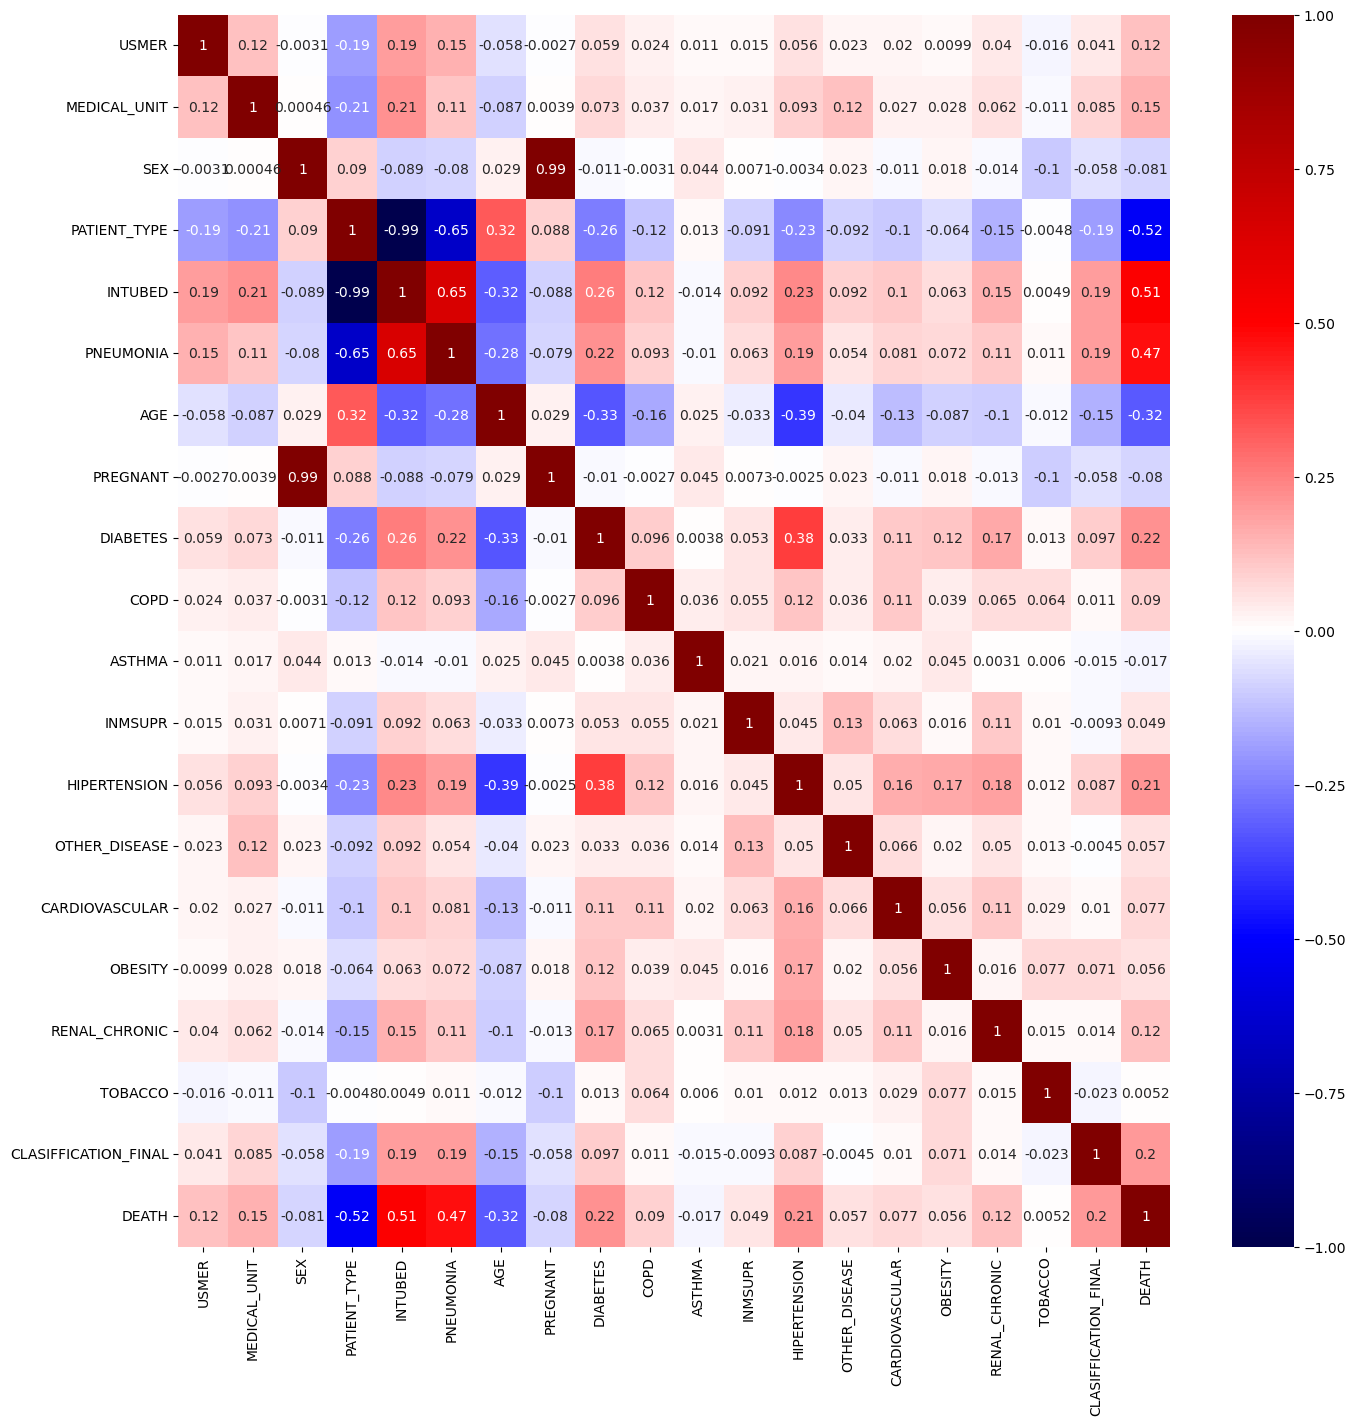

In [40]:
# create a heatmap plot
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.

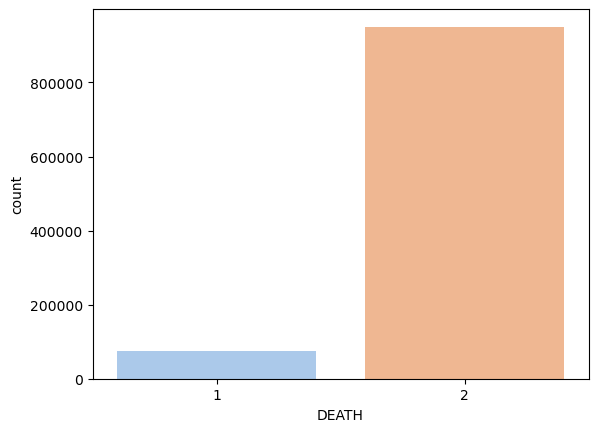

In [41]:
import  matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="DEATH", data=df, palette="pastel")
plt.show()

Using crosstab plot to see Number of patients who died from COVID-19 based on age where 2- means this patient is alive, 1- dead

In [42]:
df['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

It is a big number for death, next I want to check at what age it mostly happens

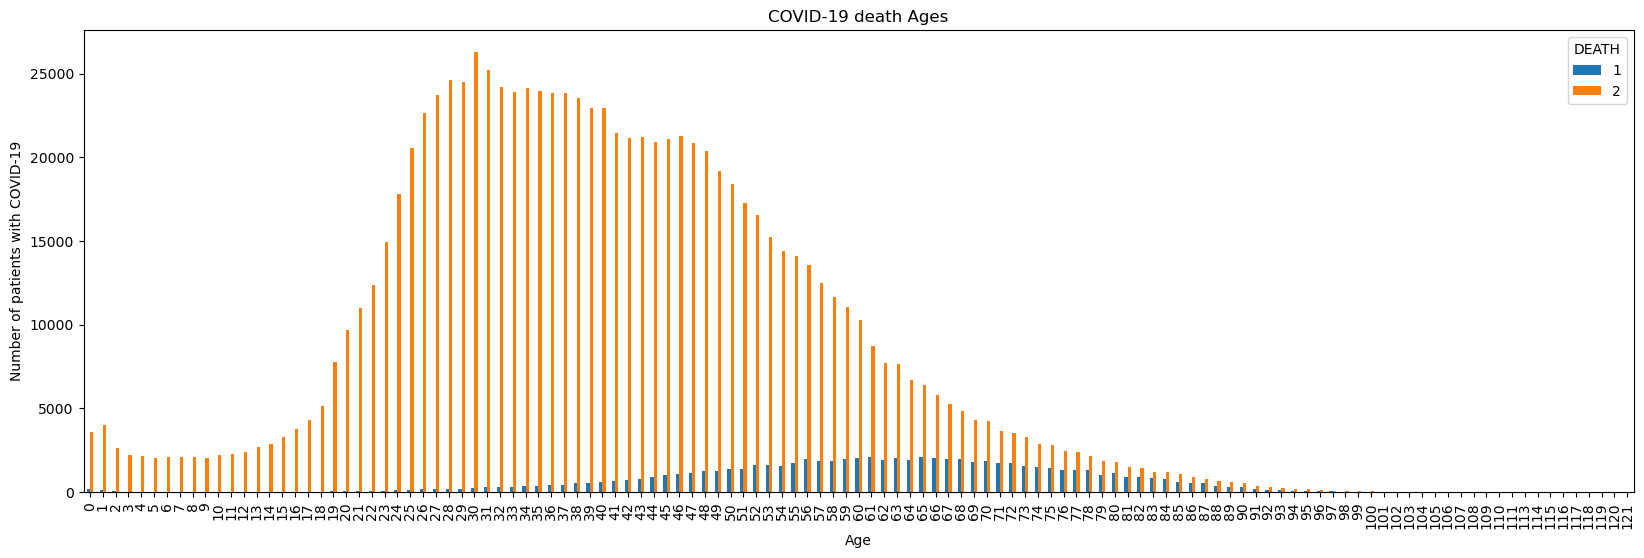

In [43]:
# plating crosstab plot
pd.crosstab(df.AGE,df.DEATH).plot(kind="bar",figsize=(20,6))
plt.title('COVID-19 death Ages')
plt.xlabel('Age')
plt.ylabel('Number of patients with COVID-19')
plt.show()

Here we can come to the conclusion, it's very rerely happens at a youg age it's mostly at the age of 50-80 y.o

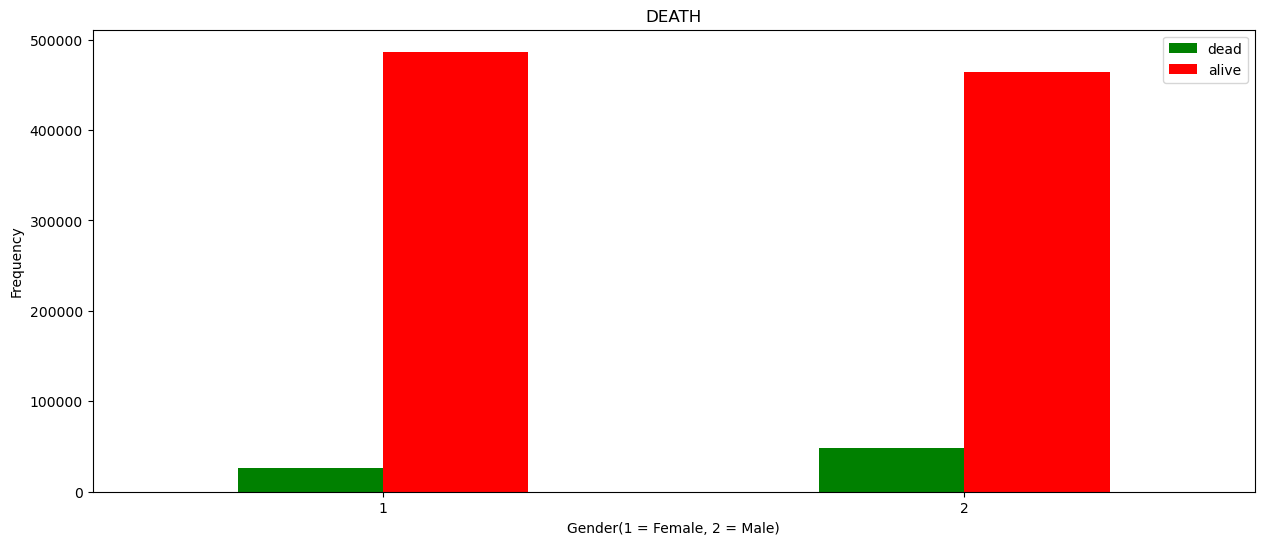

In [44]:
#ploting crosstab to see wether gender affects the number of death
pd.crosstab(df.SEX,df.DEATH).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('DEATH')
plt.xlabel('Gender(1 = Female, 2 = Male)')
plt.xticks(rotation=0)
plt.legend(["dead", "alive"])
plt.ylabel('Frequency')
plt.show()

Gender does not really affect the number of death. 

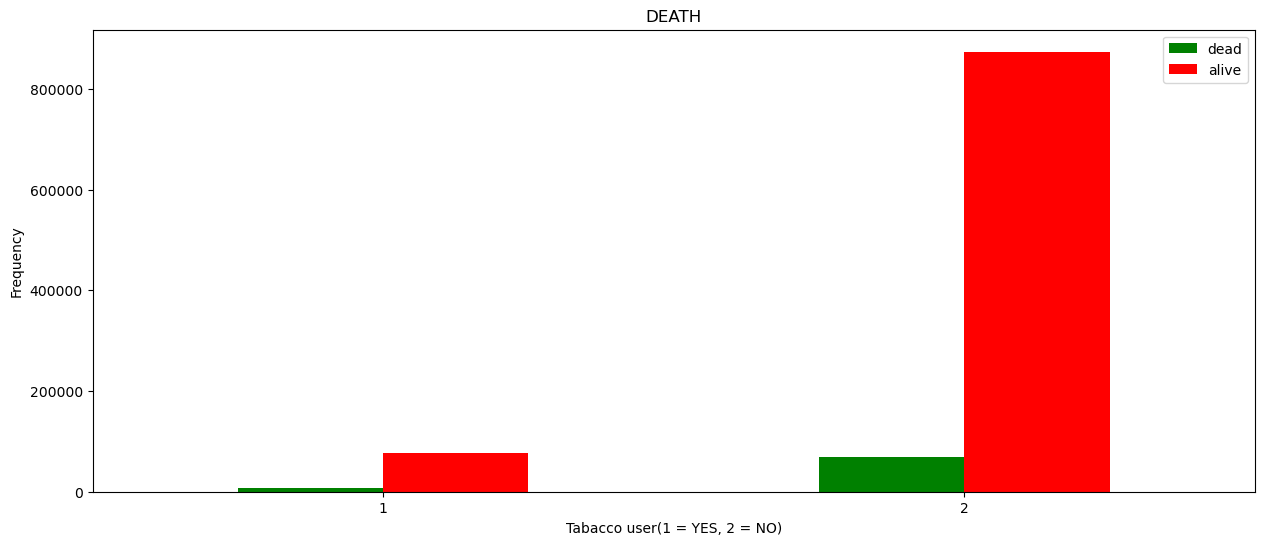

In [45]:
#ploting crosstab to see wether TABACCO affects the number of death
pd.crosstab(df.TOBACCO,df.DEATH).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('DEATH')
plt.xlabel('Tabacco user(1 = YES, 2 = NO)')
plt.xticks(rotation=0)
plt.legend(["dead", "alive"])
plt.ylabel('Frequency')
plt.show()

Tabacco users are more likely to die from COVIS-19

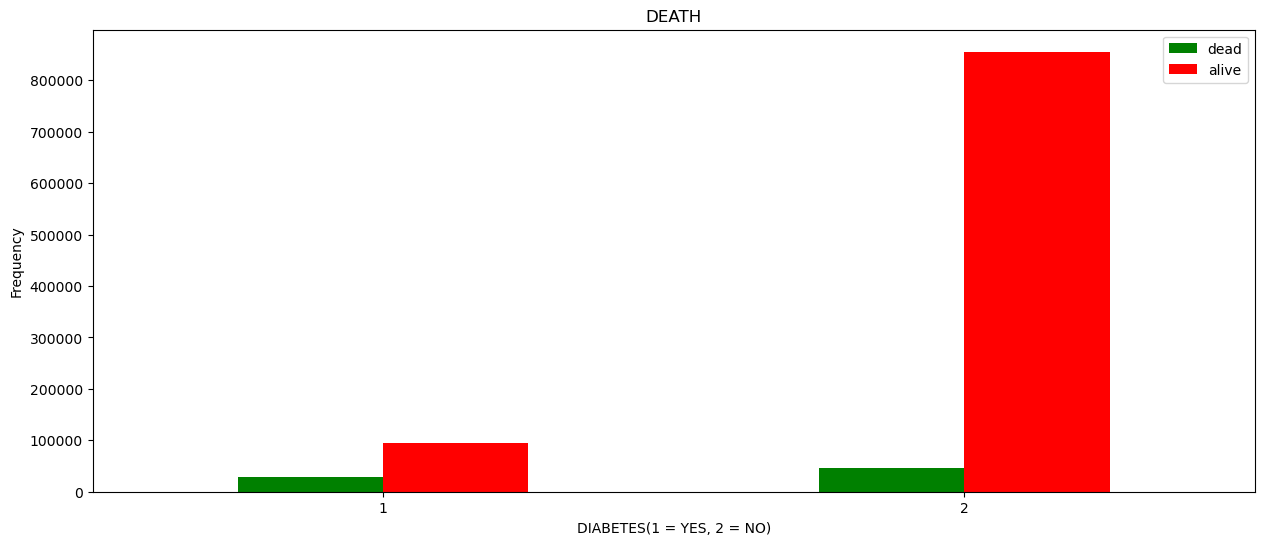

In [46]:
#ploting crosstab to see wether diabetes affects the number of death
pd.crosstab(df.DIABETES,df.DEATH).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('DEATH')
plt.xlabel('DIABETES(1 = YES, 2 = NO)')
plt.xticks(rotation=0)
plt.legend(["dead", "alive"])
plt.ylabel('Frequency')
plt.show()

Patients with diabetes are more likely to die from COVIS-19

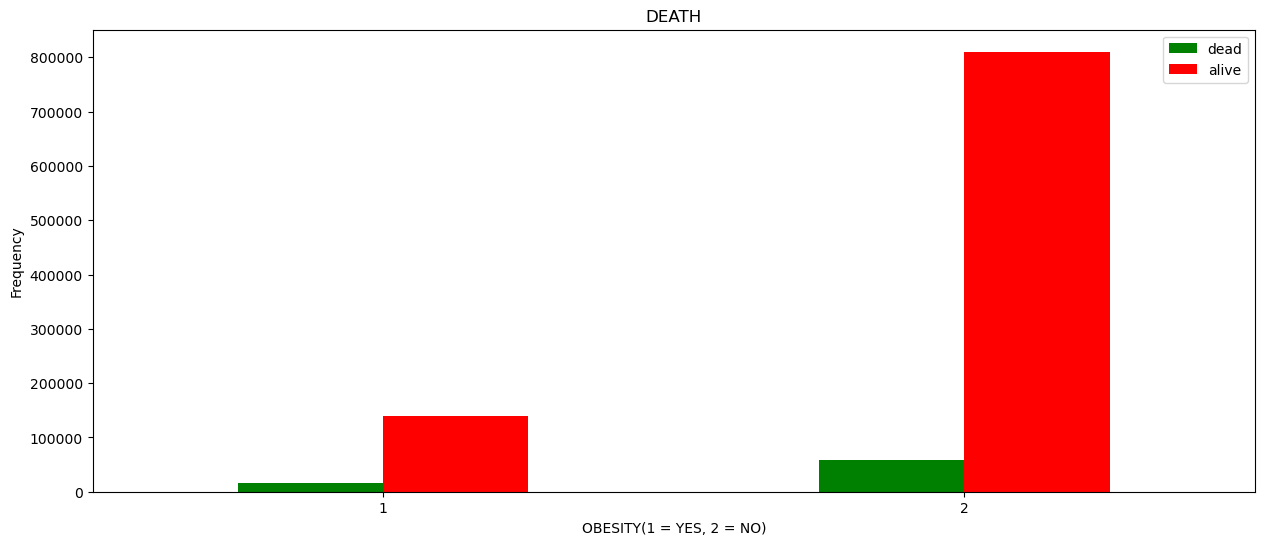

In [47]:
#ploting crosstab to see wether OBESITY affects the number of death
pd.crosstab(df.OBESITY,df.DEATH).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('DEATH')
plt.xlabel('OBESITY(1 = YES, 2 = NO)')
plt.xticks(rotation=0)
plt.legend(["dead", "alive"])
plt.ylabel('Frequency')
plt.show()

Patients with obesity are more likely to die from COVIS-19

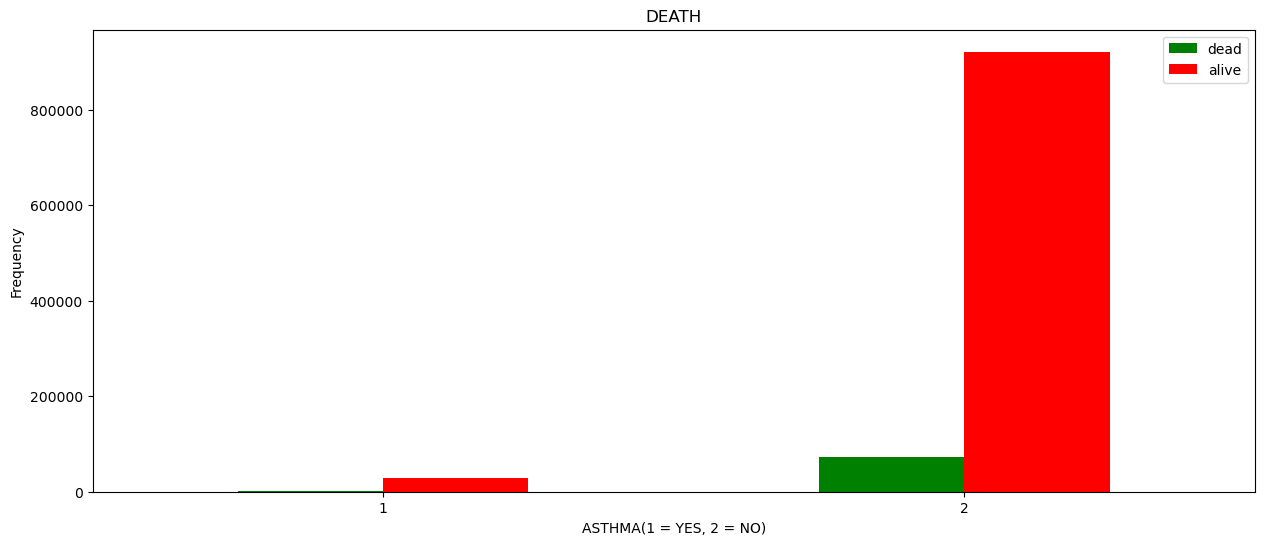

In [48]:
#ploting crosstab to see wether ASTHMA affects the number of death
pd.crosstab(df.ASTHMA,df.DEATH).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('DEATH')
plt.xlabel('ASTHMA(1 = YES, 2 = NO)')
plt.xticks(rotation=0)
plt.legend(["dead", "alive"])
plt.ylabel('Frequency')
plt.show()

Asthma doec not affect number of death from covid

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

KeyboardInterrupt: 

<Figure size 1500x1000 with 0 Axes>

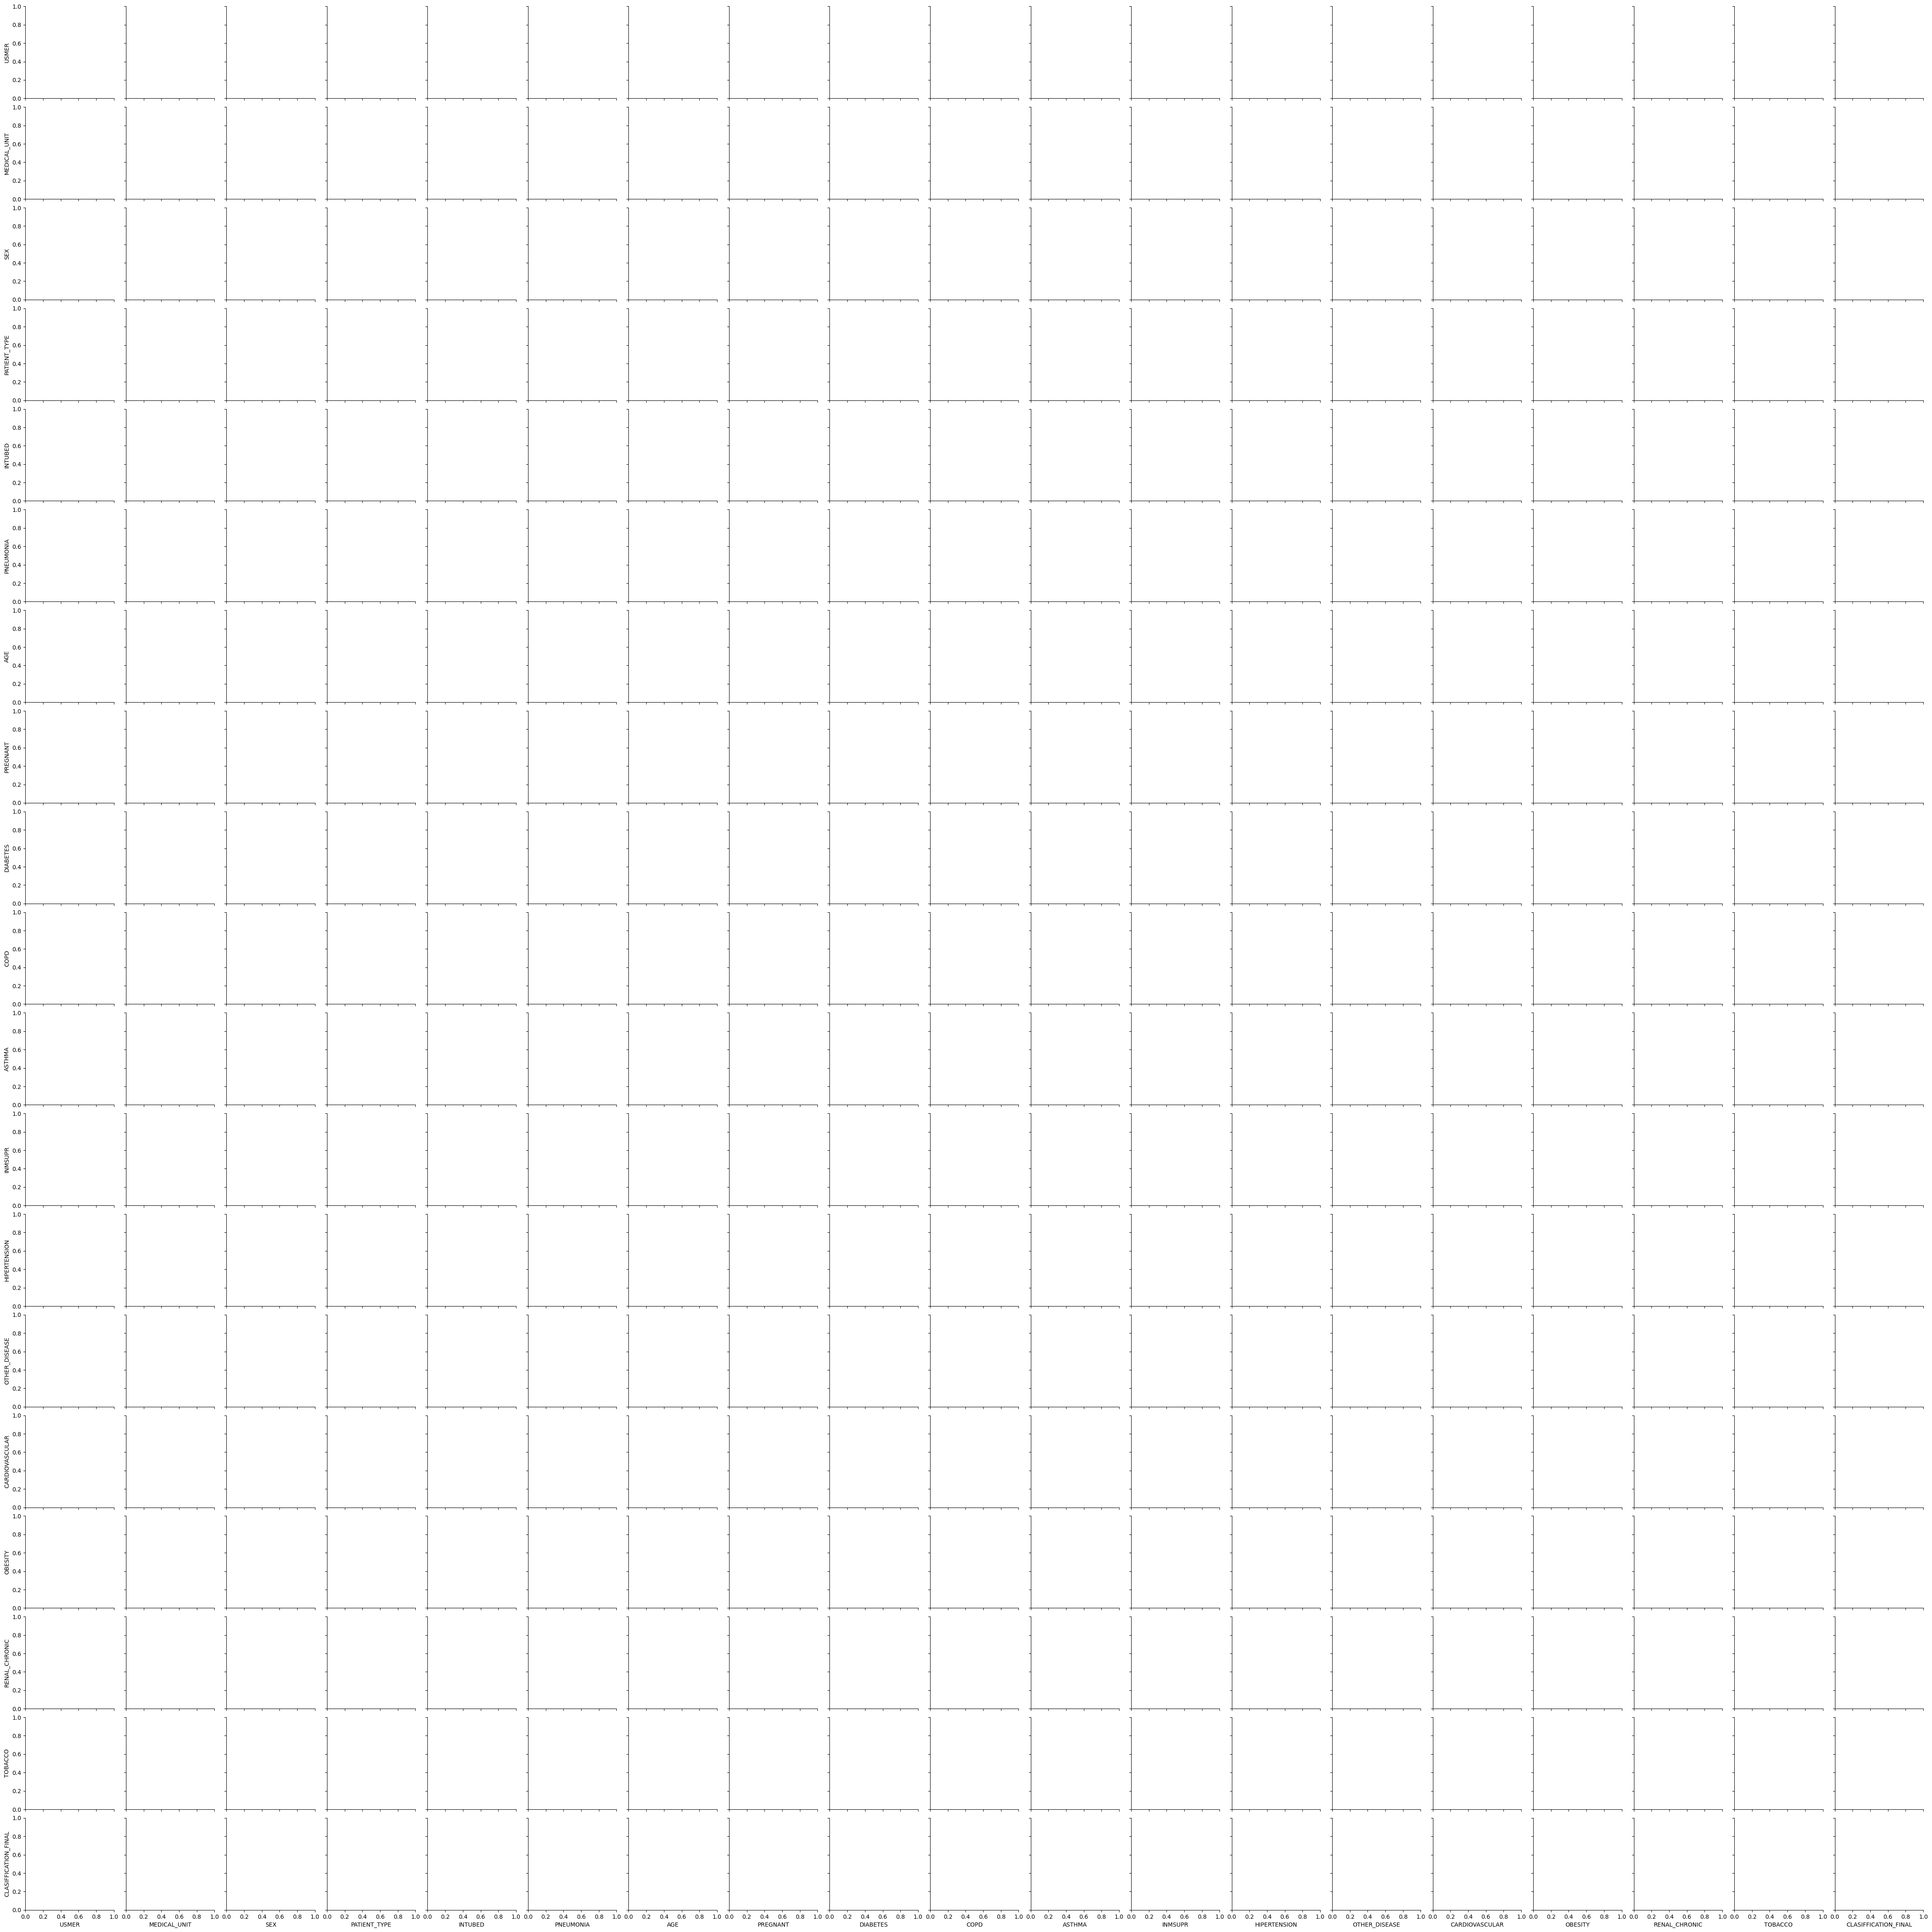

In [49]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="DEATH")
plt.title("Looking for Insites in Data")
plt.legend("COVID-19")
plt.tight_layout()
plt.plot()

Next I am splitting data into train and test to be ready for modeling. 

In [50]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [52]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [53]:
from sklearn.model_selection import train_test_split

In [56]:
#split data into test and train 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("X_Train :",x_train.shape)
print("X_Test :",x_test.shape)
print("Y_Train :",y_train.shape)
print("Y_Test :",y_test.shape)

X_Train : (820121, 35)
X_Test : (205031, 35)
Y_Train : (820121,)
Y_Test : (205031,)


## Modeling

For modeling: I used logistic regration, random forest, decision tree, stacking resembling for setting on rendomforest as the model with the best cross-validation perfomance, random forest feature importance ranking I used for guiding the choice anf order of variables to be included as the model underwent refinement

### Random Forest
A Gaussian classifier is a generative approach in the sense that it attempts to model class posterior as well as input class-conditional distribution. Therefore, we can generate new samples in input space with a Gaussian classifier.

In [57]:
# runing RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [58]:
#evaluate the model
from sklearn.metrics import confusion_matrix
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred_bin = model.predict(x_test)

In [59]:
#Assess the fit with a confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[  3275,  11403],
       [   400, 189953]])

In [60]:
#checking the model using sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.891156462585034
Specificity :  0.9433689584616302


In [61]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9398871390180021


<AxesSubplot:>

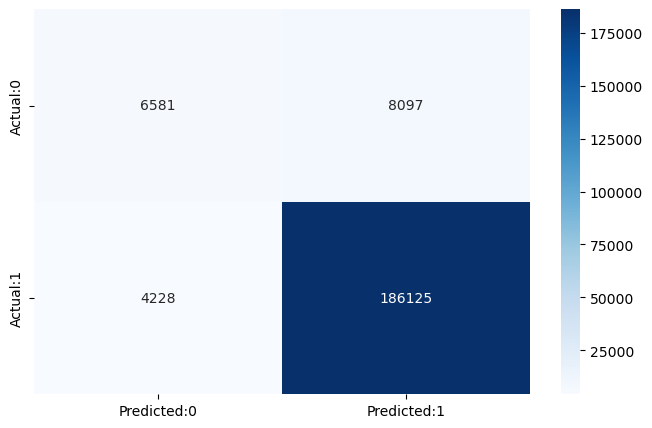

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")

True Positive(we predict our patient has Heart Disease and patient actually has it)-6581

True Negative (we predict our patient does not have Heart Disease and patient actually has it)-186125

False Positive(we predict our patient has Heart Disease and patient actually does not have it)-4228

False Negative(we predict our patient does not have Heart Disease and patient actually has it)-8097

!!!!!!!!!!!!!!!!!!!!!Inference:
We got well accuracy with Logistic Regression.
But it can mislead us so we have to check the other metrics.
When we look at the F1 Score it says that we predicted the patients who survived well but we can't say the same thing for dead patients.
Also we see the same thing when we check the confusion matrix. This problem is based on imbalance dataset as i mentioned about it.

## Evaluation

Next, I will check feature importance

In [64]:
from imblearn.under_sampling import RandomUnderSampler

rand_under = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

Let's do it again and see if it will help to fix our problem 

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("train_x :",x_train.shape)
print("test_x :",x_test.shape)
print("train_y :",y_train.shape)
print("test_y :",y_test.shape)

train_x : (119542, 35)
test_x : (29886, 35)
train_y : (119542,)
test_y : (29886,)


In [66]:
print(x.shape)
print(y.shape)


(1025152, 35)
(1025152,)


In [69]:
logreg.fit(x_train, y_train)
print("Logistic Regression Accuracy :", logreg.score(x_test, y_test))

Logistic Regression Accuracy : 0.9130696647259586


In [70]:
from sklearn.metrics import f1_score

In [71]:
print("F1 Score :",f1_score(y_test,logreg.predict(x_test),average=None))

F1 Score : [0.91431398 0.91178867]


Text(0.5, 1.0, 'Confusion Matrix')

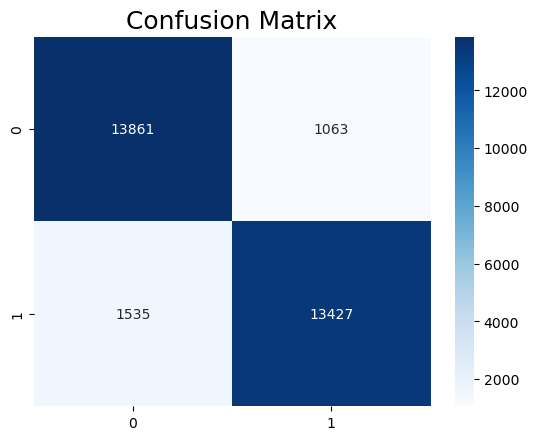

In [77]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, logreg.predict(x_test)), annot=True, fmt='d',cmap="Blues")
plt.title("Confusion Matrix", fontsize=18)

!!!!!!!!We solved the problem with Undersampling. We also could've used Oversampling and probably we would get better accuracy but i think it would be so tiring for computer.

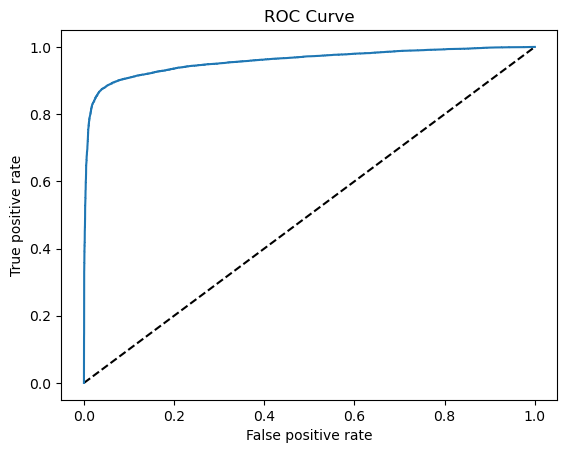

In [78]:
from sklearn.metrics import roc_curve
y_test= y_test.replace({2:1,1:0})
# Probabilities
logreg_predict = logreg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, logreg_predict[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

# Conclusion

## Limitation

## Recommendation

## Next Steps